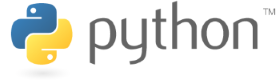

## Association Rule Mining Assigment

In this assigment we will be identifyin frequent itemsets from an online retail using the FP-Growth Algorithm in Pyspark.

The data can be found on the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Online+Retail)nd is described as "a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail."

But first, we must download the sample retail data from [here](http://localhost:8888/edit/work/Online%20Retail.csv)and convert the data to .csv. This can be done in by saving as .csv in excel.

The .csv should then be placed in the same directory as this jupyter notebook.

### The following was adapted by code written by Paolo Calderon!

After reading in the .csv file, group data by 'InvoiceNo'. For a given 'InvoiceNo', we then concatenate 'StockCode' data and create a .txt file that we use as training data. Due to memory requirements and the size of the "baskets" we will only be mining association tasks from the first 5 transactions

In [1]:
import pandas as pd
df = pd.read_csv('Online Retail.csv', encoding = "ISO-8859-1")
s2 =df.groupby('InvoiceNo')['StockCode'].apply(','.join)
s2 = s2.reset_index()
s2[:5].to_csv('Online Retail.txt', columns = ["StockCode"], header=False, index=False)

#### Answer the following questions using FP-Growth

Include code as cells in your answers to show how you found your answers, e.g.,

In [  ]: length(frequent_itemsets)

... Answer: There are 25 frequent itemsets identified with a minimum support of .5 (The code and answer above are incorrect)

In [2]:
from pyspark.mllib.fpm import FPGrowth
from pyspark import SparkContext
sc = SparkContext()

data = sc.textFile("Online Retail.csv")
transactions = data.map(lambda line: line.strip().split(','))

In [5]:
data = sc.textFile("Online Retail.txt")
transactions = data.map(lambda line: line.strip().split(','))

In [6]:
model = FPGrowth.train(transactions, minSupport = 0.15, numPartitions = 10)
freqItemsets = model.freqItemsets().collect()

freqItemsetsDict = {}

for i in range(0, len(freqItemsets)):
    freqItemsetsDict[str(freqItemsets[i].items)] = freqItemsets[i].freq

#### How many frequent itemsets were found with minimum support of .15?

In [7]:
len(freqItemsets)

4241

#### How many association rules were identified with a minimum confidence of .4?

In [8]:
minConfidence = .4
rules = sorted(model._java_model.generateAssociationRules(minConfidence).collect(), 
    key=lambda x: x.confidence(), reverse=True)

for j in range(0, len(rules)):
    antecedent = list(rules[j].antecedent())
    consequent = list(rules[j].consequent())
    ruleItemset = str(antecedent + consequent)
    
    try:
        support = "{0:.15f}".format(freqItemsetsDict[ruleItemset] / transactions.count())
    except KeyError:
        next
    
    confidence = "{0:.15f}".format(rules[j].confidence())
    
    try:
        print(antecedent, '=>', consequent, '(support: '+ str(support), 'confidence: '+ str(confidence) + ')')
    except NameError:
        next

['21754', '22310', '84969', '22623', '22622', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749'] => ['22622'] (support: 0.2000

['22623', '22622', '21777', '22748', '48187"', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777', '22748', '48187"', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777', '22748', '48187"', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777', '22748', '48187"', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777', '22748', '48187"', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777', '22749', '48187"', '22745', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777', '22749', '48187"', '22745', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777', '22749', '48187"', '22745', '"848

['84969', '22623', '22622', '21777', '22748'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '22748'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '22748'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '22748'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22749', '22748', '48187"', '22745', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22749', '22748', '48187"', '22745', '"84879', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22749', '22748', '48187"', '22745', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22749', '22748', '48187"', '22745', '"84879', '21755'] => ['22622'

['21754', '22623', '21777', '22749', '22748', '48187"', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22749', '22748', '48187"', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22749', '22748', '48187"', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22749', '22748', '48187"', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22749', '22748', '48187"', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22749', '48187"', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22749', '48187"', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22749', '48187"', '21755'] => ['22748'] (support: 0.

['21754', '22310', '21777', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777', '22745'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '22749', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '22749', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '22749', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '22749', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777'

['22310', '84969', '22623', '22622', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '48187"', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '48187"', '"84879', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '48187"', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '48187"', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969

['21754', '22310', '84969', '22623', '21777', '22749', '22748', '48187"', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '21777', '22749', '22748', '48187"', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '21777', '22749', '22748', '48187"', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '22748', '48187"', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '22748', '48187"', '"84879', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '22748', '48187"', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '22748', '48187"', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622

['22310', '21777', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777', '22749', '22748', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777', '22749',

['22310', '22623', '22622', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '"84879', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '"84879', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22748', '48187"', '22745', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22748', '48187"', '22745', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22748', '48187"', '22745', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22748'

['22310', '84969', '22622', '21777', '22749', '48187"', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '21777', '22749', '48187"', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '21777', '22749', '48187"', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84406B', '84029G', '84029E'] => ['"85123A'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84406B', '84029G', '84029E'] => ['21730"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84406B', '84029G', '84029E'] => ['71053'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84406B', '84029G', '84029E'] => ['22752'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '22749', '48187"', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '2262

['21777', '22749', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22749', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22749', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22749', '48187"'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22749', '48187"'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22749', '48187"'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22749', '48187"'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22749', '48187"'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22748'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22748'] => ['22310'] (support: 0.200000000000000 conf

['21754', '21777', '22749', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22749', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22749', '22745', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22749', '22745', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22749', '22745', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22749', '22745', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22745'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '

['84969', '22622', '21777', '22749', '22748', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '21777', '22749', '22748', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22748', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22748', '48187"', '22745', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22748', '48187"', '22745', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22748', '48187"', '22745', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22748', '48187"', '22745', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22748', '48187"', '22745', '"84879'] => ['84969'] (support: 0.200000000000000 co

['48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['48187"'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22748', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22748', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22748', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22748', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22748', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22748', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22748', '21755'] => ['22623'] (support: 0.200000000000

['21754', '22623', '22622', '21777', '22749'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '21777', '22749'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '21777', '22749'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '21777', '22749'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '21777', '22749'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '21777', '22749'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '22749', '22748'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '22749', '22748'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '22749', '22748'] => ['"84

['21754', '84969', '22623', '22622', '22748', '48187"', '22745', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '22748', '48187"', '22745', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '22748', '48187"', '22745', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22745', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22745', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22745', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22745', '"84879', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22745', '"84879', '21755'] => ['48187"'] (support: 0.200000000000

['22622', '21777', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22745'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22745'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22745', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22745', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22745', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22745', '21755'] => ['22749'] (support: 0.200000000

['22310', '22623', '22622', '21777', '22749', '22748', '48187"', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '22749', '22748', '48187"', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21755'] => ['48187"'] (support: 0.200000000000000 confidenc

['21754', '22310', '84969', '22622', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22745', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22745', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22745', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22745', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22745', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22745', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1

['22310', '84969', '22623', '22748', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22748', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22748', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22748', '22745'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22748', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22748', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22748', '22745'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '48187"', '22745', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '48187"', '22745', '21755'] => ['2

['21754', '22622', '21777', '22749', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22749', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22749', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22749', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '21777', '22749', '48187"', '22745', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '21777', '22749', '48187"', '22745', '"84879', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22748', '22745', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22748', '22745', '21755'] => ['21754'] (

['21754', '22310', '22622', '22749', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22749', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22749', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22749', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22749', '22748', '22745', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22749', '22748', '22745', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22749', '22748', '22745', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22749', '22748', '22745', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '226

['22310', '84969', '22623', '21777', '22749', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777', '22749', '48187"', '22745', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777', '22749', '48187"', '22745', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '22749'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '22749'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '22749'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '22749'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '22749'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '22749'] => ['21755'] (support: 0.2000

['22623', '22622', '22749', '22748', '22745', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '22749', '22748', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '22749', '22748', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '22749', '22748', '22745', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '22749', '22748', '22745', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777', '22749', '22748', '48187"', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777', '22749', '22748', '48187"', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777', '22749', '22748', '48187"', '"84879'] => ['22623'] (sup

['22310', '22623', '21777', '22749', '22748', '48187"', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '22749', '22748', '48187"', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '22749', '22748', '48187"', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '22749', '22748', '48187"', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '22749', '22748', '48187"', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22749', '22748', '48187"', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22749', '22748', '48187"', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310

['84969', '21777', '22749'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22749'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22749'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22749'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22749'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22749'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '21777', '22749', '48187"', '22745', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '21777', '22749', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '21777', '22749', '48187"', '22745', '"84879'] =>

['22310', '22623', '22748', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22748', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22748', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22748', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22748', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22748', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22748', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22748', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22748', '48187"', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)

['21754', '22310', '84969', '21777', '22749', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22749', '48187"'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22749', '48187"'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84406B', '21730"', '84029E'] => ['"85123A'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84406B', '21730"', '84029E'] => ['84029G'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84406B', '21730"', '84029E'] => ['71053'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84406B', '21730"', '84029E'] => ['22752'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22749', '22748', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22749', '22748', 

['21754', '22310', '84969', '22623', '22622', '21777', '22749', '22748', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '21777', '22749', '22748', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '21777', '22749', '22748', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22749', '22745', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22749', '22745', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22749', '22745', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22749', '22745', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.00

['84969', '22623', '21777', '22749', '22745', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '22749', '22745', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '22749', '22745', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '22749', '22745', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '22749', '22745', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['71053', '84029E'] => ['84406B'] (support: 0.200000000000000 confidence: 1.000000000000000)
['71053', '84029E'] => ['22752'] (support: 0.200000000000000 confidence: 1.000000000000000)
['71053', '84029E'] => ['"85123A'] (support: 0.200000000000000 confidence: 1.000000000000000)
['71053', '84029E'] => ['84029G'] (support: 0.200000000000000 confidence: 1.00000000

['21754', '21777', '22749', '22748', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22749', '22748', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22749', '22748', '48187"', '22745'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22749', '22748', '48187"', '22745'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22749', '22748', '48187"', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22749', '22748', '48187"', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '48187"', '22745', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '48187"', '22745', '21755'] => ['22749'] (support: 0.200000000000000 confid

['22623', '21777', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '48187"', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '48187"', '22745'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '48187"', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22749', '48187"', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22749', '48187"', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22749', '48187"', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22749', '48187"', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22749', '48187"', '21755'] => ['22745'] (support: 0.20000000000

['21754', '22310', '22622', '22749', '22748', '48187"', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22749', '22748', '48187"', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22749', '22748', '48187"', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22749', '22748', '22745', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22749', '22748', '22745', '"84879', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22749', '22748', '22745', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22749', '22748', '22745', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22749', '22748', 

['21754', '84969', '22622', '22749', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22749', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22749', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22749', '22748', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22749', '22748', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22749', '22748', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22749', '22748', '"84879', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22749', '22748', '"84879'] => ['21755

['22310', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22745', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22745', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22749'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22749'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22749'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22749'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22749'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22749'] => ['22745']

['22752', '84406B'] => ['"85123A'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22752', '84406B'] => ['84029G'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22752', '84406B'] => ['84029E'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22752', '84406B'] => ['21730"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22752', '84406B'] => ['71053'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22748', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22748', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22748', '22745', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22748', '22745', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22748', '22745', '"84879'] => ['22749'

['21754', '84969', '22623', '22749', '48187"', '22745', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '22745', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '22745', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '22745', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '22745', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '22745', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '22745', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22749', '22748', '48187"', '"84879'] => ['21777'] (support: 0.200000000000000 

['21754', '22310', '22623', '21777', '22748', '48187"', '22745', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '21777', '22748', '48187"', '22745', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '21777', '22748', '48187"', '22745', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '21777', '22748', '48187"', '22745', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22748', '48187"', '22745', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22748', '48187"', '22745', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22748', '48187"', '22745', '"84879', '21755'] => ['84969'] (support: 0.200000000000000 confi

['21754', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22745', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '22749', '22745', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '22749', '22745', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '22749', '22745', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '22749', '22745', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '22749', '22745', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '226

['21754', '22310', '84969', '22622', '21777', '22748', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777', '22748', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622'] => ['21755'] (support: 0.200000000

['22310', '84969', '22623', '22622', '22749', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '22749', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '22749', '22745', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22752', '21730"', '71053', '"85123A', '84029E'] => ['84029G'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22752', '21730"', '71053', '"85123A', '84029E'] => ['84406B'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22745', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22745', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22745', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22745', '21755'] => ['22622'] (support: 0.200000000000000 confidenc

['22310', '84969', '22622', '21777', '22748', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '21777', '22748', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '21777', '22748', '22745', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '21777', '22748', '22745', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22749', '22748', '48187"', '22745', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22749', '22748', '48187"', '22745', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22749', '22748', '48187"', '22745', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22

['22310', '22623', '22622', '21777', '22749', '22748', '22745'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22748', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22748', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22748', '48187"', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22748', '48187"', '22745'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22748', '48187"', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22748', '48187"', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22748', '48187"', '22745'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84029G'] => ['84406B'] (supp

['21754', '22310', '22623', '22622', '21777', '22748', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '21777', '22748', '48187"', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '21777', '22748', '48187"', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '21777', '22748', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '21777', '22748', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '21777', '22748', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '21777', '22748', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '21777', '22748', '21755

['21754', '84969', '22623', '22622', '22749', '22748', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22749', '22745', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22749', '22745', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22749', '22745', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22749', '22745', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22749', '22745', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22749', '22745', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22745'] => ['22623'] (support: 0.200000000000000 confidence: 

['22622', '22749', '48187"', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '22749', '48187"', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '22749', '48187"', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22748', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22748', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22748', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22748', '22745'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22748', '22745'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22748', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '849

['21754', '22310', '84969', '22622', '21777'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749', '48187"', '22745', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749', '48187"', '22745', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749', '48187"', '22745', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749', '48187"', '22745', '"84879', '21755'] 

['22623'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22748'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22748'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22748'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22748'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22

['22310', '84969', '22623', '22622', '21777', '22749', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '21777', '22749', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '21777', '22749', '48187"', '22745'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22749', '22748', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22749', '22748', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22749', '22748', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22749', '22748', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '2231

['22752', '"85123A'] => ['84029E'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22752', '"85123A'] => ['21730"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22752', '"85123A'] => ['71053'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22752', '"85123A'] => ['84406B'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '48187"', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '48187"', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '48187"', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '48187"', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '48187"', '"84879', '21755'] => ['22

['22623', '22749', '22748', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22749', '22748', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22749', '22748', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22749', '22748', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22749', '22748', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22749', '22748', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '21777'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '21777'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '21777'] => ['"84879'] (support: 0.200000000000000 confidence: 1.0

['21777', '22749', '22748', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22749', '22748', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22749', '22748', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22749', '22748', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22748', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22748', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22748', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22748', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22748', '21755'] => ['48187"'] (support: 0.200000000000000 con

['22310', '84969', '22623', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '48187"', '22745'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1

['21754', '22623', '21777', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '48187"', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '48187"', '22745'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '48187"', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22748', '48187"', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22748', '48187"', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22748', '48187"', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22748', '48187"', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22748', '48187"', '21755'] => ['22622'] (support: 0.200000000000000 conf

['21754', '21777', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '48187"', '22745'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '48187"', '22745'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '48187"', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '48187"', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '21777', '22749', '22748', '22745'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '21777', '22749', '22748', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '21777', '22749', '22748', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '21777', '227

['21754', '22623', '22749', '22748', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22749', '22748', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22749', '22748', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22749', '22748', '48187"'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22749', '22748', '48187"'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22749', '22748', '48187"'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '21777', '22749', '22745', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '21777', '22749', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '

['84969', '22622', '21777'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777', '22748', '22745', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777', '22748', '22745', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777', '22748', '22745', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777', '22748', '22745', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777', '22748', '22745', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777', '22748', '22745', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '48187"', '22745', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969

['21754', '22310', '84969', '22748', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22748', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22748', '22745'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22748', '22745'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22748', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22748', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22749', '48187"', '22745', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22749', '48187"', '22745', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '2262

['21754', '22310', '22623', '22622', '21777', '22749', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '21777', '22749', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '21777', '22749', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '21777', '22749', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22749', '22748', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22749', '22748', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22749', '22748', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22749', '2274

['84969', '21777', '22749', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22749', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22749', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '22749', '22748', '48187"', '22745', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '22749', '22748', '48187"', '22745', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '22748'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '22748'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '22748'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '226

['21754', '22310', '84969', '22622', '22748', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '22748', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '22748', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '22748', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '22748', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22749', '22748', '48187"'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22749', '22748', '48187"'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22749', '22748', '48187"'] => ['21777'] (support: 0.200000000000000 confid

['84969', '22749', '22745', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22749', '22745', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22749', '22745', '"84879', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22749', '48187"', '22745', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22749', '48187"', '22745', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22749', '48187"', '22745', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22749', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22749', '48187"', '22745', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.00000000000000

['21754', '22310', '84969', '22623', '22622', '22748', '22745'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '22748', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '849

['21754', '22310', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '21777', '22749', '22745', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '21777', '22749', '22745', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '21777', '22749', '22745', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '21777', '22749', '22745', '"84879', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '22749', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000

['21754', '84969', '22623', '22622', '21777', '22749', '22748', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '21777', '22749', '22748', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22749', '22745', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22749', '22745', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22749', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22749', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22749', '22745', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['8

['22623', '22748', '22745', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22748', '22745', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22748', '22745', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22748', '22745', '"84879', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22748', '22745', '"84879', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22748', '22745', '"84879', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22749', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22749', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '

['21754', '22310', '22622', '22749', '22748', '48187"', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22749', '22748', '48187"', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22749', '22748', '48187"', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22749', '22748', '48187"', '"84879', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '8

['21754', '22310', '84969', '22622', '21777', '22748', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777', '22748', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777', '22748', '48187"', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22749', '48187"', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22749', '48187"', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22749', '48187"', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22749', '48187"', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22749', '48187"', '"84879'] => ['22622'] (support: 0.20000000

['22310', '22623', '22622'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777', '22749', '48187"'] => ['22310'] (support: 0.200000000000000 confidence

['84969', '22623', '22622', '21777', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '21777', '22749', '22745', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '21777', '22749', '22745', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '21777', '22749', '22745', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '21777', '22749', '22745', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '21777', '22749', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['

['21754', '22623', '22622', '21777', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '21777', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '21777', '22745'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '21777', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22749', '22748', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22749', '22748', '48187"', '22745', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22749', '22748', '48187"', '22745', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22749', '22748', '48187"', '22745', '"84879'] => ['22622'] (support: 0.200000000000000 confid

['21754', '22310', '22623', '22622', '21777', '22749', '48187"', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '21777', '22749', '48187"', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '21777', '22749', '48187"', '"84879', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '21777', '22748', '48187"', '22745', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '21777', '22748', '48187"', '22745', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '21777', '22748', '48187"', '22745', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22748', '48187"'] => ['"8487

['21754', '21777', '22749', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22749', '48187"', '22745'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22749', '48187"', '22745'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22749', '48187"', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22749', '48187"', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '22749', '22748', '22745'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '22749', '22748', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '22749', '22748', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '22749', '22748', '22745'] => [

['22623', '22622', '21777', '22749'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777', '22749'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777', '22749'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777', '22749'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777', '22749'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777', '22749'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777', '22749'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22749', '22748', '22745', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22749', '22748', '22745', '"84879', '21755'] => ['22623'] (s

['22622', '21777', '22749', '22748', '48187"', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22748', '48187"'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22748', '48187"'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22748', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22748', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22748', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22748', '48187"'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22748', '48187"'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22748', '48187"'] => ['22622'] (support: 0.200000000000000 confidence: 1.00000000

['22622', '22749', '22748', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '22749', '22748', '48187"', '22745'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '22749', '22748', '48187"', '22745'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '22749', '22748', '48187"', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22749', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22749', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22749', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22749', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22749', '21755'] => ['"

['84969', '22623', '22622', '21777', '22748', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '22748', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '22748', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '22748', '48187"'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22749', '22748', '48187"'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22749', '22748', '48187"'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22749', '22748', '48187"'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22749', '22748', '48187"'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22749', '22748', '48187"'] => ['"848

['21754', '22310', '22622', '21777', '22749', '22745', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '21777', '22749', '22745', '"84879', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22749', '22748', '22745', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22749', '22748', '22745', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22749', '22748', '22745', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22749', '22748', '22745', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22749', '22748', '22745', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22749', '22748', '22745', '21755'] => ['21754'] (s

['84969', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '"84879', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '"84879', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22748', '48187"', '"84879', '21755'] => ['22623'] (support: 0

['22310', '22623', '21777', '22749', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '22749', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '22749', '48187"', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '22749', '48187"', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '22749', '48187"', '22745'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22745', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22745', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22745', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['

['84969', '21777', '22749', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22749', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22749', '22745'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22749', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22748', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22748', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22748', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22748', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22748', '"84879', '21

['21754', '22310', '84969', '22623', '22748'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22748'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22748'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22748'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22748'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '22748', '22745', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '22748', '22745', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '22748', '22745', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)


['84969', '22623', '21777', '22748', '22745'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '22748', '22745'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '22748', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '22748', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '22748', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '22748', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '22748', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22749', '22748', '48187"', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969

['22310', '22623', '22749'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22749'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22749'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22749'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22749'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22749'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22749'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '21777', '22748', '22745', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '21777', '22748', '22745', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['2175

['21754', '84969', '22623', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22748', '48187"', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22748', '48187"', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22748', '48187"', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22748', '48187"', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22748', '48187"', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.

['21754', '22310', '22622', '22749', '48187"', '22745'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22749', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22749', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22749', '48187"', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22748', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22748', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22748', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22748', '21755'] => ['22749'] (support: 0.200000000000000 confiden

['22310', '21777', '22749', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22749', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22749', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22749', '22745'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22749', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22749', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22749', '22745'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '22745'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '22745'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)

['21754', '22310', '84969', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22748', '48187"'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22748', '48187"'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22748', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22748', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22748', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22748', '48187"'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22748', '48187"'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '48187"', '21755'] => ['2262

['22310', '22749'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22749'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22749'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22749'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22749'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22749'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22749'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22749'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '21777', '48187"'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '21777', '48187"'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '217

['21754', '22310', '22623', '22622', '21777', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '21777', '48187"', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22749', '22745', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22749', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22749', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22749', '22745', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22749', '22745', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '22749', '22745', '"8

['21754', '22310', '22622', '21777', '22748', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '21777', '22748', '48187"'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '21777', '22748', '48187"'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22745', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22745', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22745', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22745', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22745', '"84879'] => ['48187"'] (support: 0.20

['21754', '22310', '22623', '22622', '22748'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22748'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22748'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22748'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22748'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22748'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22748'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22749', '22748', '22745', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22749'

['21754', '22623', '21777', '22749', '22748', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22749', '22748', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22749', '22748', '22745', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22749', '22748', '22745', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22749', '22748', '22745', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777', '22748'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777', '22748'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777', '22748'] => ['48187"'] (support: 0.200000000000000 confidence: 1.00

['22310', '22622', '22748', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22748', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22748', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22748', '48187"'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22748', '48187"'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22748', '48187"'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22748', '48187"'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '22749', '22748', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '22749', '22748', '48187"'] => ['22745'] (support: 0.2

['22310', '22623', '21777', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '22745', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '22745', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '22745', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '21777', '48187"', '22745'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '21777', '48187"', '22745'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '21777', '48187"', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.0000000000

['21754', '22622', '21777', '22749', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22749', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22749', '48187"', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '22748', '22745', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '22748', '22745', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '22748', '22745', '"84879', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '22748', '22745', '"84879', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '2

['21754', '22310', '22623', '22622', '22749', '22748', '48187"', '22745', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22749', '22748', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22749', '22748', '48187"', '22745', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '48187"', '22745', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '48187"', '22745', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '48187"', '22745', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '48187"', '22745', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969

['84969', '22622', '22748', '48187"', '22745', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '22748', '48187"', '22745', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '22749', '22745', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '22749', '22745', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '22749', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '22749', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '22749', '22745', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '22749', '22745', '"84879'] => ['84969'] (support: 0.200000000000000 conf

['21754', '22310', '22622', '21777', '22749', '22748', '22745', '"84879', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22748', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22748', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22748', '48187"', '22745'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22748', '48187"', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22748', '48187"', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22748', '48187"', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22748', '48187"', '22745'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '

['22310', '22623', '22622', '21777', '22748', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '22748', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '22748', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '22748', '48187"'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '22748', '48187"'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '22748', '48187"'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '21777', '22749', '48187"', '22745'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '21777', '22749', '48187"', '22745'] => ['"84879

['84969', '22623', '21777', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22749', '22748', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22749', '22748', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22749', '22748', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22749', '22748', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22

['21754', '22310', '84969', '22749', '22748', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22749', '22748', '"84879', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22745', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22745', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22745', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22745', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22745', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '

['84969', '22623', '21777', '48187"', '22745', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '48187"', '22745', '"84879', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '48187"', '22745', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '48187"', '22745', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '48187"', '22745', '"84879', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '22749', '48187"', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '22749', '48187"', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310',

['21754', '22310', '22623', '22749', '22748'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22749', '22748'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22749', '22748'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22749', '22748'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22749', '22748'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '22749', '48187"', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '22749', '48187"', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '22749', '48187"', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000

['21754', '84969', '22623', '21777', '22749', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '21777', '22749', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '21777', '22749', '48187"'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '22749', '22748', '48187"', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '22749', '22748', '48187"', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '22749', '22748', '48187"', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '22749', '22748', '48187"', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '22749', '22748', '48187"', '21755'] =>

['22310', '84969', '22622', '22749', '22748', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '22749', '22748', '48187"', '22745', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22749', '22745'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22749', '22745'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22749', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22749', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22749', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22749', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22749', '22745'] => ['22310'] 

['22310', '22622', '21777', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '48187"', '22745', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '48187"', '22745', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '22749', '22748', '48187"'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '22749', '22748', '48187"'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '22749', '22748', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '22749', '22748', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '22749', '22748', '48187"'] => ['21755'] (support: 0.200000000000000 con

['21754', '84969', '22623', '22622', '21777', '22749', '22748', '48187"'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '21777', '22749', '22748', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '21777', '22749', '22748', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '21777', '22749', '22748', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '22748', '22745'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '22748', '22745'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '22748', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '2177

['21754', '84969', '22749', '22748', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22749', '22748', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22749', '22748', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22749', '22748', '48187"'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22748', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22748', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22748', '22745', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22748', '22745', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22748', '22745', '"84879'] => ['22749'] (support: 0.200000000000000 con

['22623', '21777', '22748', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '22748', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '22748', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '22748', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '22748', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '22748', '22745'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '22748', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777', '22749', '22748', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777', '22749', '22748', '"84879'] => ['21755'] (s

['84969', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '21777', '22748', '22745'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '21777', '22748', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '21777', '22748', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '21777', '22748', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '21777', '22748', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '21777', '22748', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '21777', '22748', '21755'] => ['"84879'] (support: 0

['21754', '84969', '22622', '21777', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22748', '22745', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22748', '22745', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22748', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22748', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22748', '22745', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22748', '22745', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22748', '22745', '"84879'] 

['84969', '22622'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22748', '22745', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22748', '22745', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confiden

['22623', '22748', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22748', '48187"'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22748', '48187"'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22748', '48187"'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22748', '48187"'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22748', '48187"'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22748', '48187"', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22748', '48187"', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22748', '48187"', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22748', '48187"', '"848

['22310', '84969', '22748', '48187"', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22748', '48187"', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22748', '48187"', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22748', '48187"', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22748', '48187"', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22748', '48187"', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22748', '48187"', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22749', '22745'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '2262

['22310', '84969', '22622', '22749', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '22749', '48187"', '22745', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622'] => ['21755'] (support: 0.200000000000000 confidence: 1.00000000000

['71053', '"85123A'] => ['84029G'] (support: 0.200000000000000 confidence: 1.000000000000000)
['71053', '"85123A'] => ['84029E'] (support: 0.200000000000000 confidence: 1.000000000000000)
['71053', '"85123A'] => ['21730"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22748', '48187"', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22748', '48187"', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22748', '48187"', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22748', '48187"', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22748', '48187"', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22748', '48187"', '"84879'] => ['21754'] (su

['21754', '22310', '84969', '48187"', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '48187"', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22749', '48187"', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22749', '48187"', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22749', '48187"', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22749', '48187"', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22749', '48187"', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22749', '48187"', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.00000000

['21754', '84969', '22623', '22622', '21777', '22748', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '21777', '22748', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '21777', '22748', '48187"', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22748', '48187"', '22745', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22748', '48187"', '22745', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22748', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22748', '48187"', '22745', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969',

['21754', '22310', '84969', '22749', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22749', '48187"', '22745', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '22748', '22745', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '22748', '22745', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '22748', '22745', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '22748', '22745', '"84879', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '48187"', '22745', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', 

['22310', '22623', '22749', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22749', '48187"'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22749', '48187"'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22749', '48187"'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22748', '48187"', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22748', '48187"', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22748', '48187"', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22748', '48187"', '"84879', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22748', '48187"', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['227

['21754', '84969', '22623', '22622', '21777', '22749', '22748', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '21777', '22749', '22748', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '21777', '22749', '22748', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22749', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22749', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22749', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22749', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22749', '"84879', '21755'] => ['22745'

['21754', '84969', '22623', '48187"', '22745', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '48187"', '22745', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '48187"', '22745', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22749', '22745'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22749', '22745'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22749', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22749', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22749', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '217

['21754', '22310', '84969', '22623', '22748', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22748', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '22749', '48187"', '22745', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '22749', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '22749', '48187"', '22745', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '22749', '48187"', '22745', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22748', '48187"', '22745', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '

['21754', '22622', '21777', '22748', '"84879', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777', '48187"', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777', '48187"', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777', '48187"', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777', '48187"', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777', '48187"', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777', '48187"', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777', '48187"', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '217

['21754', '22623', '22622', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '22745', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '22745', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22749', '48187"', '22745', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22749', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22749', '48187"', '22745', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22749', '48187"', '22745', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754

['84969', '22623', '22749', '22748', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22749', '22748', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22749', '22748', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22749', '22748', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22749', '48187"', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22749', '48187"', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22749', '48187"', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22749', '48187"', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22749', '48187"', '21755'] =>

['22310', '84969', '22623', '22622', '22748', '22745', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '21777', '22748', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '21777', '22748', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '21777', '22748', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '21777', '22748', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '21777', '22748', '"84879', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '21777', '22748', '"84879', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22745', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.0

['21754', '22310', '84969', '22623', '22622', '21777', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '21777', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22749', '22748', '48187"', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22749', '22748', '48187"', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22749', '22748', '48187"', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22749', '22748', '48187"', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22749', '22748', '48187"', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22749', '22748', '48187"', '"84879'] => ['

['21754', '22622', '22749', '22748', '48187"', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '22749', '22748', '48187"', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '22749', '22748', '48187"', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '22745', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '22745', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '22745', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '22745', '"84879', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '22745', '"84879', '21755'] => ['84969'] (support: 0.200000000000000 con

['84969', '22622', '21777', '22748', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '21777', '22748', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '21777', '22748', '22745', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22749', '22748', '48187"', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22749', '22748', '48187"', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22749', '22748', '48187"', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22749', '22748', '48187"', '"84879', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622',

['84969', '22622', '22749', '22748', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '22749', '22748', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '22749', '22748', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22745', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22745', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22745', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22745', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22745', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22745', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000

['21754', '84969', '22623', '22622', '22749', '48187"', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '22749', '48187"', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '22749', '48187"', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '22749', '48187"', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '22749', '48187"', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '22749', '48187"', '22745', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '22749', '48187"', '22745', '"84879', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['

['22310', '84969', '22623', '22749', '48187"', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22749', '48187"', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22749', '48187"', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22749', '48187"', '"84879', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22749', '48187"', '"84879', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '21777', '22748', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '21777', '22748', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310'

['84969', '22623', '22622', '22745'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22745'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22745'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22749', '22748'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22749', '22748'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)

['84969', '22622', '22749', '22748', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '22749', '22748', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '22749', '22748', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777'] => ['21755'] (support: 0.200000000000000 confidence: 1.00000

['22310', '84969', '21777', '22748', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '21777', '22748', '48187"'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '21777', '22748', '48187"'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '21777', '22748', '48187"'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '21777', '22748', '48187"'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '48187"', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '48187"', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '48187"', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '48187"', '"84879'] => ['21777'] (support: 0.20000000

['22310', '84969', '22623', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '48187"', '22745', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '21777', '22748', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '21777', '22748', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '21777', '22748', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '21777', '22748', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777', '22749', '48187"', '22745', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
[

['21754', '22623', '22622', '22749', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '22749', '48187"', '22745'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '22749', '48187"', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '21777', '48187"', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '21777', '48187"', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '21777', '48187"', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '21777', '48187"', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '21777', '48187"', '"84879'] => ['22745'] (support: 0.200000000000000 co

['22310', '84969', '22623', '22622', '21777', '22749'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '21777', '22749'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '21777', '22749'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '21777', '22749'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '21777', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '21777', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '21777', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '21777', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1

['84969', '22749', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22749', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22749', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22749', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '21777', '22749', '22745', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '21777', '22749', '22745', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '21777', '22749', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '21777', '22749', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '21777', '22749', '22745', '"84879'] => ['22623'] (support: 0.2000

['21754', '22310', '84969', '21777', '22748', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22748', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22748', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22748', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22748', '22745'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22748', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '22748', '22745', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '22748', '22745', '21755'] => ['48187"'] (support: 0.200000000000000 confidence:

['84969', '22623', '22622', '21777', '22749', '22748', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '22749', '22748', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22749', '48187"', '22745', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22749', '48187"', '22745', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22749', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22749', '48187"', '22745', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22749', '48187"', '22745', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969'

['22310', '22622', '21777', '22748'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22748'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22748'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22748'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22748'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22748'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22748'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '22749', '48187"', '22745'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '22749', '48187"', '22745'] => ['"84879'] (support: 0.2000000

['22310', '22622', '21777', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '48187"', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '48187"', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '48187"', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '48187"', '"84879'] => ['

['71053', '"85123A', '84029G', '84029E'] => ['84406B'] (support: 0.200000000000000 confidence: 1.000000000000000)
['71053', '"85123A', '84029G', '84029E'] => ['22752'] (support: 0.200000000000000 confidence: 1.000000000000000)
['71053', '"85123A', '84029G', '84029E'] => ['21730"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '48187"', '22745'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '48187"', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '48187"', '22745'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '48187"', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '48187"', '22745'] => ['22623'] (support: 

['21754', '22623', '21777', '22748', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22748', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22748', '48187"', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22748', '48187"', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22748', '48187"', '22745'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22748', '48187"', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '21777', '22748', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '21777', '22748', '21755'] => ['22745']

['21754', '84969', '22748', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22748', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22748', '48187"'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22748', '48187"'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22748', '48187"'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22748', '48187"'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22749', '22748', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22749', '22748', '48187"', '22745', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', 

['21754', '22310', '21777'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777', '22748', '22745'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777', '22748', '22745'

['21754', '22310', '22623', '22749', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22749', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22749', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22749', '48187"'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22749', '48187"'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22749', '22748', '48187"', '22745', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22749', '22748', '48187"', '22745', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22749', '22748', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.0000000

['21754', '22623', '22622', '21777', '22749', '48187"', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '21777', '22749', '48187"', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '21777', '22749', '48187"', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '21777', '22749', '48187"', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622'] => ['22745'] (support: 0.20

['84969', '22622', '21777', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '21777', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '21777', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '48187"', '22745'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '48187"', '22745'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '48187"', '22745'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '48187"', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '48187"', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310'

['21754', '22310', '84969', '22623', '22622', '21777'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777', '22749', '22748', '22745', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777', '22749', '22748', '22745', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777', '22749', '22748', '22745', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22748', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22748', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22748', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22748', '"84879', '21755'] => [

['21754', '84969', '22623', '22622', '22749', '48187"', '22745'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '22749', '48187"', '22745'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '22749', '48187"', '22745'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '22749', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '22749', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '22748', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '22748', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '8

['84969', '22623', '22749'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22749'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22749'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22749'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22749'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22749'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22748'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22748'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22748'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22748'] => ['21755'] (support: 0.200000000000000 confidence: 1.0000000000000

['22310', '22622', '22749', '22748', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22749', '22748', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22749', '22748', '48187"', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22749', '22748', '48187"', '22745'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22749', '22748', '48187"', '22745', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22749', '22748', '48187"', '22745', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22749', '22748', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22749', '22748', '48187"', '22745', '"84879'] => ['22622'] (support: 0.200000000000000 co

['84969', '22622', '21777', '22749'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '"84879', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '"84879', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 

['84406B', '21730"', '71053', '84029G'] => ['84029E'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84406B', '21730"', '71053', '84029G'] => ['22752'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '21777', '22748', '48187"', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '21777', '22748', '48187"', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '21777', '22748', '48187"', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22749', '48187"', '22745', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22749', '48187"', '22745', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22749'

['21754', '22310', '22623', '22622', '21777', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '21777', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '21777', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '21777', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '21777', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '21755']

['22622', '21777', '22749', '22748', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22749', '22748', '48187"', '22745', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22749', '22748', '48187"', '22745', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22749', '22748', '48187"', '22745', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '48187"', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '48187"', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '48187"', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '48187"', '"84879'] => [

['84969', '22623', '21777', '22748', '48187"', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '22748', '48187"', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '22748', '48187"', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '22748', '48187"', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '48187"', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '48187"', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '48187"', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '48187"', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22

['22623', '22622', '48187"', '22745', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '48187"', '22745', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '48187"', '22745', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '48187"', '22745', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '48187"', '22745', '"84879', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '48187"', '22745', '"84879', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '22749', '48187"', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '22749', '48187"', '21755'] => ['22623'] (support: 0

['22623', '22622', '22749', '22748', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '22749', '22748', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '22749', '22748', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '22749', '22748', '48187"'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '22749', '22748', '48187"'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '22748', '22745', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '22748', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '22748', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000

['84969', '22622', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '21777', '22745', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '21777', '22745', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '21777', '22745', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '21777', '22745', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '21777', '22745', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '21777', '22745', '21755'] => ['8

['22310', '22623', '22622', '22748'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '22748'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '22748'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '22748'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '22748'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '22748'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '22748'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '22748'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '48187"', '22745', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000

['21754', '22310', '84969', '22622', '22749', '22748', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '22749', '22748', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22749', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22749', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22749', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22749', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22749', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22749', '"84879'] => ['84969

['22622', '22749', '48187"', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '22749', '48187"', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '22749', '48187"', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '22749', '48187"', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '22749', '48187"', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '22749', '48187"', '"84879', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '22749', '48187"', '"84879', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22749', '22748', '48187"', '22745', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84

['21754', '22623', '21777', '22749', '22748', '48187"', '22745', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22749', '22748', '48187"', '22745', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '21777', '22749', '22748', '48187"', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '21777', '22749', '22748', '48187"', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '21777', '22749', '22748', '48187"', '"84879', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '21777', '22749', '22748', '48187"', '"84879', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22749', '22748', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)

['21754', '84969', '22623', '21777', '22748', '22745', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '21777', '22748', '22745', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '21777', '22748', '22745', '"84879', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '21777', '22749', '22748', '22745', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '21777', '22749', '22748', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '21777', '22749', '22748', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '21777', '22749', '22748', '22745', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '8

['84969', '21777', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '48187"', '22745', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '48187"', '22745', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '21777', '22748', '48187"', '22745', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22912'] => ['22913'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22912'] => ['22914"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22912'] => ['"22960'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '22748', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '22748', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '22748

['22310', '84969', '22623', '21777', '22748', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777', '22748', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777', '22748', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777', '22748', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777', '22748', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777', '22748', '22745'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '22749', '22748', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '22749', '22748', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000

['22310', '22749', '22748', '22745', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22749', '22748', '22745', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22749', '22748', '22745', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22749', '22748', '22745', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '22749', '22748', '48187"', '22745', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '22749', '22748', '48187"', '22745', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '22749', '22748', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22748', '"84879'] => 

['84969', '22623', '21777', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '22745', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '48187"', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '48187"', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '48187"', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '48187"', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '48187"', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '48187"', '21755']

['22622', '22749', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '22749', '48187"', '22745', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '22749', '48187"', '22745', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '22749', '48187"', '22745', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '21777', '48187"', '22745', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '21777', '48187"', '22745', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '21777', '48187"', '22745', '"84879', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22748', '22745', '21755'] => ['2

['22623', '21777', '22748', '48187"', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '22748', '48187"', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '22748', '48187"', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '22748', '48187"', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '22748', '48187"', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '22748', '48187"', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22745'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22745'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22745'] => ['22749'] (support: 0.

['22623', '22622', '21777', '48187"', '22745', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '21777', '22749', '22748', '48187"', '22745', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '21777', '22749', '22748', '48187"', '22745', '"84879', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22749', '22748', '48187"'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22749', '22748', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22749', '22748', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22749', '22748', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.0000000000

['21754', '84969', '22749', '22748'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22749', '22748'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22749', '22748'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22749', '22748'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22749', '22748'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22749', '22748'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22749', '22748'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '21777', '22749', '22748', '48187"', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '21777', '22749', '22748', '48187"', '2175

['84969', '22623', '22622', '21777', '22749', '22748', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '22749', '22748', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '22749', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '22749', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '22749', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '22749', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22749', '22748', '48187"', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.00000000000

['21754', '22622', '21777', '48187"', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '48187"', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22745'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22745'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22745'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22745'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.0000000000000

['21754', '22310', '22623', '22749', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22749', '48187"', '22745', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22749', '48187"', '22745', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '21777', '48187"', '22745'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '21777', '48187"', '22745'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '21777', '48187"', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '21777', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '21777', '48187"', '22745'] => ['21755'] (sup

['21754', '22310', '84969', '22623', '22622', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '48187"'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '48187"'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '48187"'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', 

['21754', '22623', '22622', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '48187"'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '48187"'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22749', '22748', '48187"', '22745'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22749', '22748', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22749', '22748', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22749', '22748', '48187"', '22745'] => ['226

['21754', '22622', '22749', '22748', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '22749', '22748', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '22749', '22748', '48187"'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22749', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22749', '"84879', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22749', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22749', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22749', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['8

['22310', '22623', '22622', '21777', '22749', '22748'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '22749', '22748'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '22749', '22748'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '22749', '22748'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '22749', '22748'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22748', '48187"', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22748', '48187"', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22748', '48187"', '21755'] => ['21777'] (support: 0.200000000000000 confidence

['21754', '84969', '21777', '22749', '22748', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '21777', '22749', '22748', '48187"'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '21777', '22749', '22748', '48187"'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '21777', '22745'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '21777', '22745'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '21777', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '21777', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '21777', '22745'] => ['21755'] (support: 0.200000000000000 confidence:

['22310', '84969', '22623', '22748', '48187"', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22748', '48187"', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22748', '48187"', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22748', '48187"', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22748', '48187"', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22748', '48187"', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22749'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22749'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22749

['21754', '22310', '22623', '22622', '22748', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22748', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22748', '48187"', '22745'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22748', '48187"', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22748', '48187"', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '21777', '22749', '48187"', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '21777', '22749', '48187"', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['

['22310', '22749', '48187"', '22745', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22749', '48187"', '22745', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22749', '48187"', '22745', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22749', '48187"', '22745', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777', '48187"', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777', '48187"', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777', '48187"', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777', '48187"', '21755'] => ['"84879'] (support: 0.200000000000000 confi

['84969', '22622', '22749', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22749', '48187"', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22749', '48187"', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22749', '48187"', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22749', '48187"', '"84879', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22749', '48187"', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22749', '48187"', '"84879', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22749', '48187"', '"84879', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '48187"', '"

['"85123A'] => ['84029E'] (support: 0.200000000000000 confidence: 1.000000000000000)
['"85123A'] => ['71053'] (support: 0.200000000000000 confidence: 1.000000000000000)
['"85123A'] => ['21730"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22749', '48187"', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22749', '48187"', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22749', '48187"', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22749', '48187"', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22749', '48187"', '"84879', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '22749'] => ['22310'] (support: 0.200

['21754', '84969', '22623', '21777', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '21777', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '21777', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '21777', '48187"'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749', '22748', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749', '22748', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749', '22748', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749', '22748', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749', '22748', '"84879', '21755'] => ['22622'] (support: 0.200000000000000 con

['21754', '22622', '21777', '22748', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22748', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22748', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22748', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22748', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754

['22310', '84969', '22623', '22748'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22748'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22748'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22748'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22748'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22748'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21730"'] => ['84406B'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21730"'] => ['22752'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21730"'] => ['"85123A'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21730"'] => ['84029G'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21730"'

['21754', '84969', '22623', '48187"', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '48187"', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '22749', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '22749', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '22749', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '22749', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '22749', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '22749', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '22749', '21755'] => [

['84969', '22622', '22749', '22748'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '22749', '22748'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '22749', '22748'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22749', '48187"', '22745'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22749', '48187"', '22745'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22749', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22749', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22749', '48187"', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22749', '48187"', '22745'] => ['22310'] (support: 0.2000

['84969', '22623', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777', '22748', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777', '22748', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777', '22748', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777', '22748', '48187"'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777', '22748', '48187"'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777', '22748', '48187"'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '

['22310', '84969', '22622', '22748', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '22748', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '22748', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '22748', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '22748', '"84879', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '22748', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '22748', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '22748', '48187"'] => ['21755'] (support: 0.200000000000000 confi

['21754', '84969', '22622', '22749', '22748', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22749', '22748', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '21777', '22749', '48187"', '22745', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '21777', '22749', '48187"', '22745', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '21777', '22749', '48187"', '22745', '"84879', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22749'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22749'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22749'] =>

['22310', '22623', '22622', '21777', '48187"', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '48187"', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22748', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22748', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22748', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22748', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22748', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22748', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22748', '"84879'] => ['22623'] (support: 0.200000000000000 co

['22310', '22623', '22749', '48187"', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22749', '48187"', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22749', '48187"', '"84879', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22749', '48187"', '"84879', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22749', '48187"', '"84879', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22752', '84406B', '71053', '84029G'] => ['21730"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22752', '84406B', '71053', '84029G'] => ['"85123A'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22752', '84406B', '71053', '84029G'] => ['84029E'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623',

['21754', '22310', '84969', '22623', '21777', '22749', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '21777', '22749', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '21777', '22749', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '21777', '22749', '48187"'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777', '22745', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777', '22745', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777', '22745', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777', '2

['21754', '22623'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22749', '48187"', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22749', '481

['21754', '84969', '21777', '22749', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '21777', '22749', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '21777', '22749', '48187"', '22745'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '21777', '22749', '48187"', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '22749', '22745', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '22749', '22745', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '22749', '22745', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '22749', '22745', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confi

['84969', '22622', '22745', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '22745', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22749', '22748', '48187"', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22749', '22748', '48187"', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22749', '22748', '48187"', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22749', '22748', '48187"', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', 

['22310', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '48187"', '22745'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22748', '48187"', '22745', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22748', '48187"', '22745', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22748', '48187"', '22745', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22748', '48187"', '22745', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22749', '22748'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22749', '22748'] => ['"84879'] (support: 0.200000000000000 confidence: 1.00000000000

['84406B', '71053', '"85123A'] => ['84029G'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84406B', '71053', '"85123A'] => ['84029E'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84406B', '71053', '"85123A'] => ['22752'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22745', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22745', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22745', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22745', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22745', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 

['21754', '22310', '84969', '21777'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '217

['21754', '84969', '22622', '22748'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22748'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22748'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22748'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22748'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22752', '84406B', '"85123A', '84029G'] => ['84029E'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22752', '84406B', '"85123A', '84029G'] => ['21730"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22752', '84406B', '"85123A', '84029G'] => ['71053'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '48187"', '22745', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.00

['21754', '22310', '22623', '22622', '21777', '22749', '22748', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '21777', '22749', '22748', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '21777', '22749', '22748', '48187"', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22749', '22748', '22745'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22749', '22748', '22745'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22749', '22748', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22749', '22748', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969

['22310', '22622', '21777', '22748', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22748', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22748', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22748', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22748', '22745'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '21777', '48187"', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '21777', '48187"', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '21777', '48187"', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '21777', '48187"', '"84879'] =

['21754', '22623', '21777', '22749', '22748', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22749', '22748', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22749', '22748', '48187"'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22749', '22748', '48187"'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22749', '22748', '48187"'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '22748', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '22748', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '22748', '48187"', '22745'] => ['21777'] (support: 0.200000000000000 confid

['21754', '22310', '22623', '22622', '22749'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22749'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22749'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22749'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22749'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '22749'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '21777', '48187"', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '21777', '48187"', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.0000000000000

['21754', '22310', '84969', '22623', '22622', '21777', '22749', '48187"', '22745', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '21777', '22749', '48187"', '22745', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22749', '48187"', '22745', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22749', '48187"', '22745', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22749', '48187"', '22745', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22749', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22749', '48187"', '22745', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22749'

['21754', '22623', '21777', '22749', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22749', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22749', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22749', '48187"'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22749', '48187"'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22749', '48187"'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '48187"', '22745', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '48187"', '22745', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '

['22310', '22623', '22622', '22749', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '22749', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '22749', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '22749', '22745'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22748', '48187"', '22745', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22748', '48187"', '22745', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22748', '48187"', '22745', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22748', '48187"', '22745', '"84879', '21755'] => ['22622'

['21754', '84969', '22622', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777', '22749', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777', '22749', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777', '22749', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777', '22749', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777', '22749', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', 

['21754', '84969', '22623', '22622', '21777', '22749', '22748'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '21777', '22749', '22748'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '21777', '22749', '22748'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22749', '48187"', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22749', '48187"', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22749', '48187"', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22749', '48187"', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22749', '48187"', '"84879'] => ['21755'] (supp

['21754', '22310', '84969', '22623', '22748', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22748', '48187"', '22745', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22748', '48187"', '22745', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22748', '48187"', '22745', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '

['84969', '22623', '22622', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '22748', '48187"', '22745', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '22748', '48187"', '22745', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '22748', '48187"', '22745', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '22748', '48187"', '22745', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '22748', '48187"', '22745', '21755'] => ['84969'] (support: 0.200

['22752', '21730"', '71053', '84029G'] => ['84029E'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22752', '21730"', '71053', '84029G'] => ['84406B'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '48187"'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '48187"'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '48187"'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '48187"'] => ['84969'] (

['22310', '22748', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22748', '48187"', '22745', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22748', '48187"', '22745', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22748', '48187"', '22745', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22748', '48187"', '22745', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22748', '48187"', '22745', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22748', '48187"', '22745', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '21777', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '21777', '"84

['22623', '22749', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22749', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22749', '48187"'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22749', '48187"'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22749', '48187"'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '21777', '22749', '22745'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '21777', '22749', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '21777', '22749', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '21777', '22749', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '2

['21754', '22623', '22748', '22745', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22748', '22745', '"84879', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '22745', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '22745', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '22745', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '22745', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '22745', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '22745', '21755'] => ['48187"'] (support: 0.200000000000000 confidence:

['21754', '22310', '84969', '22623', '22622', '22749', '22748'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '22749', '22748'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777', '22748', '22745', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777', '22748', '22745', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777', '22748', '22745', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22748', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22748', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22748', '48187"'] =>

['22310', '22623', '22749', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22749', '22745', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22749', '22745', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22749', '22745', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '22748', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '22748', '"84879', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '22748', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '22748', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '22748', '"84879', '21755'] 

['21754', '22622', '21777', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '48187"', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '22749', '22748', '22745', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '22749', '22748', '22745', '"84879', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '22749', '22748', '22745', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '21777', '48187"', '22745', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '

['22310', '22623', '22749', '22748', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22749', '22748', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22749', '22748', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22749', '22748', '48187"'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22749', '22748', '48187"'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22749', '22748', '48187"'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22749', '22748', '22745', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22749', '22748', '22745', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84

['21754', '22310', '22623', '21777', '22749', '22748'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '21777', '22749', '22748'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '21777', '22749', '22748'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '21777', '22749', '22748'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '21777', '22749', '22748'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '21777', '22749', '22748', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '21777', '22749', '22748', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '21777', '22749', '22748', '21755'] => ['22745'] (support: 0.20

['21754', '22310', '22623', '22748', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22748', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22748', '22745', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22748', '22745', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22748', '22745', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22748', '22745', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777', '22749', '22748', '48187"', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777', '22749', '22748', '48187"', '2

['21754', '84969', '22622', '21777', '22749', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '22749', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '22749', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22749', '22748'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22749', '22748'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22749', '22748'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22749', '22748'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22749', '22748'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22749', '22748'] => ['21755'] (support: 0.20000000

['84969', '22622', '22748', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '22748', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '22748', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '22748', '48187"'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '22748', '48187"'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22752', '"85123A', '84029G'] => ['84029E'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22752', '"85123A', '84029G'] => ['21730"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22752', '"85123A', '84029G'] => ['71053'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22752', '"85123A', '84029G'] => ['84406B'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777', '22748

['22310', '22622', '21777', '22749', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22749', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22749', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22749', '48187"'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22749', '48187"'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22752', '21730"', '84029E'] => ['"85123A'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22752', '21730"', '84029E'] => ['84029G'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22752', '21730"', '84029E'] => ['71053'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22752', '21730"', '84029E'] => ['84406B'] (support: 0.200000000000000 confidence: 1.000000000

['21754', '22622', '21777', '22749'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22749'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22749'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22749'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '22748', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '22748', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '22748', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '22748', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '22748', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622

['21754', '22310', '22623', '21777', '22749', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '21777', '22749', '48187"', '22745', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '21777', '22749', '48187"', '22745', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '22749', '22748', '48187"', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '22749', '22748', '48187"', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '22749', '22748', '48187"', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '22749', '48187"', '"84879', '21755'] => ['22310'] (su

['22622', '21777', '22748', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22748', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22748', '48187"'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22748', '48187"'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22748', '48187"'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22748', '48187"'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '2

['21754', '22310', '84969', '22749', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22749', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22749', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22749', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '48187"'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '48187"'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '48187"']

['21754', '22310', '22623', '22748', '48187"', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22748', '48187"', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22748', '48187"', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22748', '48187"', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22748', '48187"', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22748', '48187"', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22748', '48187"', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22748', '48187"', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000

['22310', '22623', '22748'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22748'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22748'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22748'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22748'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22748'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22748'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22748'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22748'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '22748', '48187"'] => ['"84879'] (support: 0.2000000

['21754', '22310', '84969', '22749', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22749', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22749', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22748', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22748', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22748', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22748', '48187"'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22748', '48187"'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22748', '48187"'] =>

['22310', '22623', '22622', '21777', '22749', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '22749', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '22749', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '22749', '48187"'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '22749', '48187"'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '21777', '22745', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '21777', '22745', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '21777', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confid

['21754', '22310', '22623', '21777', '22749', '22748', '48187"', '22745', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '21777', '22749', '22748', '48187"', '22745', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777', '22749', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777', '22749', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777', '22749', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777', '22749', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777', '22749', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777', '22749', '21755'] => ['22622'] (support: 0.200000000000000 confidenc

['21754', '22310', '84969', '22622', '21777', '22748', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777', '22748', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777', '22748', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777', '22748', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22748', '48187"', '22745', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22748', '48187"', '22745', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22748', '48187"', '22745', '"84879', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22748', '48187"',

['22310', '22749', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22749', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22749', '48187"'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22749', '48187"'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22749', '48187"'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '21777'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '21777'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '21777'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '21777'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '21777'] => ['48187"'] (suppor

['22623', '21777', '22749', '22745', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '22749', '22745', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '22749', '22745', '"84879', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '22749', '22745', '"84879', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '22749', '22745', '"84879', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '22748', '48187"', '22745'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '22748', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '22748', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
[

['84969', '22623', '22622', '22749', '48187"'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22749', '48187"'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22749', '48187"'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22749', '48187"'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22749', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22749', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '22749', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22749', '22748', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22749', '

['21754', '22623', '21777', '22748', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22748', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22748', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22748', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22748', '22745'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22748', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '22749', '48187"'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '22749', '48187"'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622'

['21754', '22310'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '21777', '22749', '48187"', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '21777', '22749', '48187"', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '21777', '22749', '48187"', '21755'] => ['"84879'] (support

['22310', '84969', '22623', '21777', '48187"', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777', '48187"', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777', '48187"', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777', '48187"', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '22745', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '22745', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '22745', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '22745', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754'

['22310', '21777', '22745', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22745', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22745', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22745', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22745', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22745', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '21777', '22749', '22748', '48187"', '22745', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '21777', '22749', '22748', '48187"', '22745', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '2262

['21754', '22310', '84969', '22623', '22622', '21777', '22748', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '21777', '22748', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '21777', '22748', '48187"', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '22749', '22745', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '22749', '22745', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '22749', '22745', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '22749', '22745', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622

['22623', '22749', '22748'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22749', '22748'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22749', '22748'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22749', '22748'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22749', '22748'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22749', '22748'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22749', '22748'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '22749', '48187"', '22745', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '22749', '48187"', '22745', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84

['22310', '84969', '22749', '22748', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22749', '22748', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22749', '22748', '48187"', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22749', '22748', '48187"', '22745'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22749', '22748', '22745', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22749', '22748', '22745', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22749', '22748', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22749', '22748', '22745', '"84879'] => ['48187"

['21754', '22310', '21777', '22748', '48187"', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '48187"', '22745', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '48187"', '22745', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '48187"', '22745', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '48187"', '22745', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '48187"', '22745', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '48187"', '22745', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '48187"', '22745', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22749', '

['22310', '84969', '22622', '22749', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '22749', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '22749', '48187"', '22745'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22749', '22748', '48187"', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22749', '22748', '48187"', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22749', '22748', '48187"', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22749', '22748', '48187"', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22749', '22748', '48187"', '21755'] => ['22745'] (support: 0.200000000000000 confi

['21754', '84969', '22623', '22622', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '22749', '22748', '48187"', '22745'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '22749', '22748', '48187"', '22745'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '22749', '22748', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '22749', '22748', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '22749', '22748', '48187"', '22745'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '48187"', '22745'] => ['22623'] (suppo

['84969', '22623', '22622', '21777', '22748', '22745', '"84879', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '22748', '22745', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '22748', '22745', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', 

['22310', '84969', '22622', '21777', '22749', '22748', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '21777', '22749', '22748', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '21777', '22749', '22748', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '21777', '22749', '22748', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22745', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22745', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22745', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22745', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confi

['21754', '84969', '22623', '22622', '21777', '22748', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '21777', '22748', '48187"', '22745', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22749', '22748', '22745', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22749', '22748', '22745', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22749', '22748', '22745', '"84879', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22749', '22748', '22745', '"84879', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22748', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['

['21754', '84969', '22622', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22749', '48187"', '22745'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22749', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22749', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22749', '48187"', '22745'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22749', '48187"', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.

['22310', '22622', '21777', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22745'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '21777', '22749', '22748', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '21777', '22749', '22748', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '21777', '22749', '22748', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '849

['21777', '22748', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22748', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22748', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22748', '48187"'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22748', '48187"'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22748', '48187"'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22748', '48187"'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22748', '48187"'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22748', '48187"'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22749', '48187"', '"84879'] => ['21777'] (support: 0.200000000000000 c

['22310', '84969', '22623', '21777', '22748', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777', '22748', '48187"', '22745', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777', '22748', '48187"', '22745', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '21777', '22748', '48187"', '22745', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '48187"'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '48187"'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '48187"'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '21777', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623

['21754', '22310', '22623', '22622', '21777', '22748'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '21777', '22748'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '21777', '22748'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '21777', '22748'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777', '22749', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777', '22749', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777', '22749', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777', '22749', '21755'] => ['22745'] (supp

['21754', '84969', '22622', '22748', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22748', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22748', '22745'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22748', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22748', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22748', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22748', '48187"', '22745'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22748', '48187"', '22745'] => ['22749'] (support: 0.200000000000000 confidenc

['22310', '22623', '21777', '22748', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '22748', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '22748', '22745', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '22748', '22745', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '22748', '22745', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '21777', '22748', '22745', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22749', '22748', '48187"', '22745', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22749', '22748', '48187"', '22745', '21755'] => ['"84879

['84969', '22749'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22749'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22749'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22749'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22749'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22749', '22745', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22749', '22745', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22749', '22745', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22749', '22745', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22749', '22745', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.0000000000

['22310', '84969', '22622', '22748', '48187"', '22745', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '22748', '48187"', '22745', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '22748', '48187"', '22745', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22745', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22745', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22745', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22745', '"84879'] 

['21754', '22310', '84969', '22623', '21777', '22748', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '21777', '22748', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '21777', '22748', '48187"', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '21777', '22748', '48187"', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22748', '48187"', '22745', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22748', '48187"', '22745', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22748', '48187"', '22745', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22748', '4

['21754', '22310', '22623', '21777', '22748', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '21777', '22748', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '21777', '22748', '22745', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '21777', '22748', '22745', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '21777', '22748', '22745', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22749', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22749', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22749', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000

['84969', '22623', '21777', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '21777', '48187"'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22745', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22745', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22745', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22745', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '

['21754', '22622', '21777', '22749', '22748', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '21777', '22749', '22748', '48187"', '22745', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22748', '22745'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22748', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22748', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22748', '22745'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22748', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22748', '22745'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22748', '22745'] => ['21754'] 

['21754', '22310', '84969', '22623', '22622', '22748', '48187"', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '22748', '48187"', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '22748', '48187"', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '22748', '48187"', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '48187"', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '48187"', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '48187"', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '48187"', '"84879'] => [

['22310', '84969', '22622', '48187"', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '48187"', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '48187"', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22748', '48187"', '22745'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22748', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22748', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22748', '48187"', '22745'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22748', '48187"', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22748', '48187"', '22745'] => ['22622'] (support: 0.200000000000000 confidence

['21754', '22310', '84969', '21777', '22749', '22745', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '21777', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '21777', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '21777', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '21777', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '21777', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22622', '21777', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22749', '22748', '"84879'] => ['21777'] (support: 0.200000000000000 con

['21754', '22310', '84969', '22623', '22622', '21777', '22749', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '21777', '22749', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '21777', '22749', '22745', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '21777', '22749', '22745', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '21777', '22749', '22745', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '21777', '22749', '22745', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '21777', '22749', '22745', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310

['22310', '22622', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '48187"'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '48187"'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '22749', '22748', '48187"'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '22749', '22748', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '22749', '22748', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '22749', '22748', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22623', '22622', '22749', '

['21754', '22310', '84969', '22622', '21777', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '22748', '48187"', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '22748', '48187"', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '22748', '48187"', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '22748', '48187"', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22745', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22745', 

['21754', '22310', '22623', '22748'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22748'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22748'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22748'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22748'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '22748'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22752', '84406B', '21730"', '71053', '84029E'] => ['"85123A'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22752', '84406B', '21730"', '71053', '84029E'] => ['84029G'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22749', '22748', '48187"', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 co

['22749', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '21777', '22749', '48187"', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310

['84969', '21777', '22749', '22748', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22749', '22748', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22749', '22748', '48187"'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22749', '22748', '48187"'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '21777', '22749', '22748', '48187"', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '21777', '22749', '22748', '48187"', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '21777', '22749', '22748', '48187"', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '21777', '22749', '22748', '48187"', '"84879'] => ['21755'] (support: 0.200000000000000 con

['21754', '84969', '22622', '21777', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22913', '22914"'] => ['22912'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22913', '22914"'] => ['"22960'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '22749', '22745', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '22749', '22745', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '22749', '22745', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', 

['21754', '84969', '22622', '22748', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22748', '48187"', '22745', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22748', '48187"', '22745', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '22745', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '22745', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '22745', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '22745', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '22745', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '22745', '21755'] => 

['22310', '84969', '22622', '22748', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '22748', '48187"', '22745', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '22748', '48187"', '22745', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '22748', '48187"', '22745', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22748', '48187"'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22748', '48187"'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22748', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22748', '48187"'] => ['22745'] (support: 0.200000000000000 co

['21754', '22310', '22622', '22748', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22748', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22748', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22748', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22748', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22748', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22749', '48187"', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22749', '48187"', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310',

['21754', '22310', '84969', '22622', '48187"', '22745', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '48187"', '22745', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '22749', '22748', '48187"', '22745'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '22749', '22748', '48187"', '22745'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '22749', '22748', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '22749', '22748', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '22748', '22745', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.0

['22623', '22622', '21777', '22749', '22748', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777', '22749', '22748', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777', '22749', '22748', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777', '22749', '22748', '48187"'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777', '22749', '22748', '48187"'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22748', '48187"', '22745'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22748', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '22748', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
[

['22310', '22622', '21777', '22749', '22748', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22749', '22748', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22749', '22748', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22749', '22748', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '21777', '22749', '22748', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '21777', '22748', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '21777', '22748', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '21777', '22748', '48187"', '22745'] => ['22749'] (support: 

['84969', '22749', '48187"', '22745', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22749', '48187"', '22745', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22749', '48187"', '22745', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22749', '48187"', '22745', '"84879', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '21777', '22749', '48187"', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22622', '21777', '22749', '48187"', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749', '22748', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749', '22748', '48187"'] => ['22745'] (support: 

['22310', '22622', '22748'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22748'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22748'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22748'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22748'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22748'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22748'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22748', '22745', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22748', '22745', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22748', '22745', '21755'] => ['21777'] (s

['22310', '84969', '21777', '22749', '22748'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '21777', '22749', '22748'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '21777', '22749', '22748'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '21777', '22749', '22748'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '21777', '22749', '22748'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '21777', '22749', '22748'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22749', '22745', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22749', '22745', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22749', 

['21754', '22310', '84969', '21777', '22748', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22748', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22748', '48187"', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22748', '48187"', '22745'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '21777', '22748', '48187"', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '21777', '48187"', '22745'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '21777', '48187"', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22622', '21777', '48187"', '22745'] =>

['21754', '21777', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22745', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22745', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22745', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '22745', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22749', '22748', '48187"'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22749', '22748', '48187"'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22749', '22748', '48187"'] => ['21777'] (support: 0.20

['84969', '21777', '22749', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22749', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22749', '22745', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22749', '22745', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22748', '22745', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22748', '22745', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22748', '22745', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22748', '22745', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confi

['22310', '84969', '21777', '22749', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '21777', '22749', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '21777', '22749', '48187"', '22745'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '21777', '22749', '48187"', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '21777', '22749', '48187"', '22745'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '48187"', '22745', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '48187"', '22745', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '48187"', '22745', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)

['21777', '22749', '22748', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22749', '22748', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22749', '22748', '48187"'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22749', '22748', '48187"'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22749', '22748', '48187"'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22749', '22748', '48187"'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21777', '22749', '22748', '48187"'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '22749', '22748', '22745', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '22749', '22748', '22745', '"84879'] => ['21755'] (support: 0.200

['21754', '84969', '22623', '21777', '22749', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '21777', '22749', '48187"', '22745', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '21777', '48187"', '22745', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '21777', '48187"', '22745', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '21777', '48187"', '22745', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '21777', '48187"', '22745', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '21777', '48187"', '22745', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '21777', '48187"', '22745', '21755'] => ['2262

['21754', '22623', '21777', '22749', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22749', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22749', '48187"', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22749', '48187"', '22745'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22749', '48187"', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22748', '22745', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22748', '22745', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22748', '22745', '"84879', '21755'] => ['21777'] (suppo

['21754', '84969', '22623'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '22748'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '22748'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '22748'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '22748'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22623', '22622', '21777', '22748'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310

['84406B', '84029G'] => ['84029E'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84406B', '84029G'] => ['21730"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84406B', '84029G'] => ['71053'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84406B', '84029G'] => ['22752'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22748', '48187"', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22748', '48187"', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22748', '48187"', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22748', '48187"', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22748', '48187"', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22748', '48187"

['21754', '22310', '22622', '22749', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '22749', '48187"', '22745', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '21777', '22748', '48187"', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '21777', '22748', '48187"', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '21777', '22748', '48187"', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '21777', '22748', '48187"', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '21777', '22748', '48187"', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '21777

['22752', '84029G'] => ['71053'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22752', '84029G'] => ['84406B'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22748', '22745', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22748', '22745', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22748', '22745', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22748', '22745', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22748', '22745', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22748', '22745', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777', '22748', '22745', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.0000

['22310', '84969', '22622', '22748', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '22748', '48187"'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '22748', '48187"'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '22748', '48187"'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22749', '22748', '48187"', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22749', '22748', '48187"', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22749', '22748', '48187"', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22749', '22748', '48187"', '"84879', '21755'] => ['84969'] (support: 0.200000000000000 con

['21754', '22310', '22749', '22748', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22749', '22748', '48187"', '22745', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22749', '22748', '48187"', '22745', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '21777', '22749', '22748', '22745', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '21777', '22749', '22748', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '21777', '22749', '22748', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22622', '21777', '22749', '22748', '22745', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
[

['84969', '22622', '21777', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '21777', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '21777', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '21777', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '

['21754', '22623', '21777', '22748'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22748'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22748'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22748'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22748'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22748'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '22748'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '22748', '48187"', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '21777', '22748', '48187"', '"84879'] => ['22623'] (support: 0.2000000

['84969', '21777', '22748', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22748', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22748', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22748', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22748', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22748', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22748', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '21777', '22748', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '21777', '22748', '48187"', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.00000

['21754', '84969', '48187"'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749', '"84879', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22749', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.00000

['21754', '22310', '84969', '22622', '22748'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '22748'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '22748'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '22748'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '22748'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '22748'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '22749', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22622', '22749', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310

['22310', '84969', '22749'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22749'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22749'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22749'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22749'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '22749'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22749', '22748', '22745', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22749', '22748', '22745', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '22749', '22748', '22745', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '2262

['21754', '22310', '84969', '22623', '22749'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22749'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22749'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22749'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22749'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22748', '22745', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22748', '22745', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22748', '22745', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22748', '22745', '"84879', '21755'] => 

['21754', '22310', '84969', '22748', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22748', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22748', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22748', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22748', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22749', '22748'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22749', '22748'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22749', '22748'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22622', '22749', '22748'] => ['22745'] (support: 0.200000000000000 con

['21754', '22310', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777', '22748', '48187"', '22745', '"84879'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777', '22748', '48187"', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777', '22748', '48187"', '22745', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777', '22748', '48187"', '22745', '"84879'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22622', '21777', '22748', '48187"', '22745', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '22622', '22748', '"84879'] => ['22310'] (support: 0.20000000

['21754', '22310', '84969', '22623', '22749', '22748', '22745', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22749', '22748', '22745', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22749', '22748', '22745', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22749', '"84879', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22749', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22749', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '84969', '22623', '22749', '"84879', '21755'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '2

['21754', '84969', '22623', '21777', '48187"', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '21777', '48187"', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '21777', '48187"', '"84879', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '21777'] => ['22623'] (suppo

['21754', '84969', '22623', '22622', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '48187"', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '48187"', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '48187"', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '48187"', '"84879', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '48187"', '"84879', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22623', '21777', '48187"', '"84879', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22623', '21777', '22749', '22748', '22745'] => ['22310'] (support: 0.200000000000000 co

['22622', '21777', '48187"', '21755'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '21777', '48187"', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '21777', '48187"', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '21777', '48187"', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '21777', '48187"', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '21777', '48187"', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '21777', '48187"', '21755'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '21777', '48187"', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22622', '

['22913'] => ['22914"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22913'] => ['22912'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22913'] => ['"22960'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22748', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22748', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22748', '48187"', '22745'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22748', '48187"', '22745'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22748', '48187"', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22748', '48187"', '22745'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22748', '48187"', '22745'] => ['84969'] (support: 0.200000000000000 confidence: 

['21754', '22310', '22622', '48187"'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '48187"'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '48187"', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '48187"', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '48187"', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '48187"', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '48187"', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '21777', '48187"', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754',

['22623', '22748'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22748'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22748'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22748'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22748'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22748'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22748'] => ['21754'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22623', '22748'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '48187"'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '48187"'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '84969', '48187"'] => ['22623'] (support: 0.200000000000000

['84969', '22622', '22748', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '22748', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '22748', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '22748', '"84879'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22622', '22748', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22749', '22748', '22745', '21755'] => ['22310'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22749', '22748', '22745', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22749', '22748', '22745', '21755'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '84969', '22622', '22749', '227

['21754', '22310', '84969', '22623', '48187"'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '21777', '48187"', '"84879', '21755'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '21777', '48187"', '"84879', '21755'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '21777', '48187"', '"84879', '21755'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '21777', '48187"', '"84879', '21755'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22622', '21777', '48187"', '"84879', '21755'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '22749', '22748'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22622', '22749', '22748'] => ['22310'] (support: 0.200000000000000 conf

['21754', '22310', '21777', '"84879'] => ['22748'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777', '"84879'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777', '"84879'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777', '"84879'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777', '"84879'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777', '"84879'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777', '"84879'] => ['22622'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '21777', '"84879'] => ['84969'] (support: 0.200000000000000 confidence: 1.000000000000000)
['21754', '22310', '22623', '21777', '22749', '22748', '21755'] => ['"84879'] (support: 0.200000000000000 confidence: 1

['84969', '22623', '22622', '21777', '22748', '48187"', '22745'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '22748', '48187"', '22745'] => ['21755'] (support: 0.200000000000000 confidence: 1.000000000000000)
['84969', '22623', '22622', '21777', '22748', '48187"', '22745'] => ['22749'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22749', '22748'] => ['21777'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22749', '22748'] => ['22623'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22749', '22748'] => ['"84879'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22749', '22748'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22749', '22748'] => ['48187"'] (support: 0.200000000000000 confidence: 1.000000000000000)
['22310', '22749', '22748'] => ['21755'] (support: 0.200000000000000 confidence: 1.000

In [10]:
len(rules)

25035

#### What is the support and confidence of the following association rule: ['21754', '22748'] => ['22745']? Go beyond reporting the values, but include an interpretation of these evaluation metrics.

['21754', '22748'] => ['22745'] (support: 0.200000000000000 confidence: 1.000000000000000)
A support of .20 suggests that items 21754, 22748 and 22745 appear together in 20% of the transactions. A confidence of 1 suggests that every transaction that contains items 21754 and 22748 also contains item 22745.